In [1]:
import scanpy as sc
import pandas as pd
from plotnine import * 

### function

In [2]:
def overlap_df(df):
    
    combined_df = pd.DataFrame()


    for i in df.columns.tolist():
        temp_list = [x for x in df[i].tolist() if str(x) != 'nan']
        length_of_gene_list = len(temp_list)
        temp_df = pd.DataFrame(columns = ['gene', 'tumor_ID', 'overlap'])
        temp_df['gene'] = temp_list
        temp_df['tumor_ID'] = i
        for gene in temp_list:
            number_of_overlap = 0
            for j in df.columns.tolist():
                if j != i:
                    com_temp_list = [y for y in df[j].tolist() if str(y) != 'nan']
                    if gene in com_temp_list:
                        number_of_overlap += 1
                    
            temp_df.loc[temp_df[temp_df['gene']== gene].index.values[0], 'overlap'] = number_of_overlap
        combined_df = pd.concat([combined_df, temp_df])
        
    return combined_df

In [3]:
def DEGs_stacked_bar_plots(df, color=['#023858','#045a8d','#0570b0','#3690c0','#74a9cf','#a6bddb','#d0d1e6','#ece7f2','#fff7fb']):
    plot_ref = (ggplot(df, aes(x='tumor_ID',fill='overlap_range')) 
                + geom_bar( position='fill') 
                + coord_flip() +scale_fill_manual(color)
                + theme(axis_text_x=element_text(rotation=45, hjust=1), 
                        plot_background=element_rect(fill='white', alpha=.3),
                        panel_background=element_rect(fill='white', alpha=.2),
                        panel_border=element_rect(color='black', size=1),
                        axis_ticks_major_y=element_blank(), 
                        figure_size=(2, 10)))
    
    plot_no_labels = (ggplot(df, aes(x='tumor_ID',fill='overlap_range')) 
                      + geom_bar( position='fill') + guides(fill = None)
                      + coord_flip() +scale_fill_manual(color)
                      + theme(plot_background=element_rect(fill='white', alpha=.3),
                              panel_background=element_rect(fill='white', alpha=.2),
                              panel_border=element_rect(color='black', size=1),
                              axis_title_x=element_blank(), axis_title_y=element_blank(), 
                              axis_text_x=element_blank(), axis_text_y=element_blank(), 
                              axis_ticks_major_y=element_blank(),  
                              figure_size=(2, 10)))
    
    return plot_ref, plot_no_labels

# making plots

In [4]:
final_met_genes = pd.read_csv('SS2_met_vs_primary_met_genes_list.csv',index_col=0)
final_tumor_genes = pd.read_csv('SS2_met_vs_primary_tumor_genes_list.csv',index_col=0)

## met

In [5]:
met_genes_overlap_df_not_all = overlap_df(final_met_genes.drop(columns=['J55454','H5471']))

In [6]:
met_genes_overlap_df_not_all = met_genes_overlap_df_not_all.reset_index()
met_genes_overlap_df_not_all

,index,gene,tumor_ID,overlap
0,0,IGFBP3,HCI001,0
1,1,CHI3L1,HCI001,1
2,2,LALBA,HCI001,0
3,3,DDIT4,HCI001,0
4,4,FRZB,HCI001,0
...,...,...,...,...
2980,175,SCCPDH,HCI011,2
2981,176,STRAP,HCI011,1
2982,177,SUGT1,HCI011,0
2983,178,HERPUD1,HCI011,1


In [7]:
met_genes_overlap_df_not_all['overlap'] = met_genes_overlap_df_not_all['overlap'].astype(float)
met_genes_overlap_df_not_all['overlap_range'] = met_genes_overlap_df_not_all['overlap']
for i in met_genes_overlap_df_not_all.index:
    if met_genes_overlap_df_not_all.loc[i, 'overlap'] >=4:
        met_genes_overlap_df_not_all.loc[i, 'overlap_range'] = '>4'

In [8]:
met_genes_overlap_df_not_all

,index,gene,tumor_ID,overlap,overlap_range
0,0,IGFBP3,HCI001,0.0,0.0
1,1,CHI3L1,HCI001,1.0,1.0
2,2,LALBA,HCI001,0.0,0.0
3,3,DDIT4,HCI001,0.0,0.0
4,4,FRZB,HCI001,0.0,0.0
...,...,...,...,...,...
2980,175,SCCPDH,HCI011,2.0,2.0
2981,176,STRAP,HCI011,1.0,1.0
2982,177,SUGT1,HCI011,0.0,0.0
2983,178,HERPUD1,HCI011,1.0,1.0


In [9]:
cat_order = ['>4',3,2,1,0]

met_genes_overlap_df_not_all['overlap_range'] = pd.Categorical(met_genes_overlap_df_not_all['overlap_range'], categories=cat_order, ordered=True)

cat_order = ['HCI010','J53353','J2036','H5097','HCI001','HCI011','HCI009',
             'H4272','H3204','HCI005','global']

met_genes_overlap_df_not_all['tumor_ID'] = pd.Categorical(met_genes_overlap_df_not_all['tumor_ID'], categories=cat_order, ordered=True)

In [10]:
met_genes_stacked_bar_plot_ref_not_all, met_genes_stacked_bar_plot_not_all = DEGs_stacked_bar_plots(met_genes_overlap_df_not_all,color=['#253494','#2c7fb8','#41b6c4','#a1dab4','#ffffcc'])

/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: met_genes_stacked_bar_plot(without_J55454_H5471)_ref.pdf


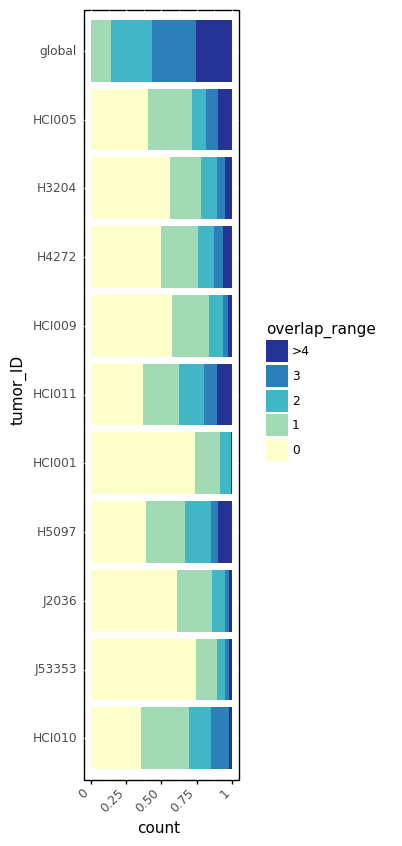

<ggplot: (8773974716760)>

In [11]:
save_as_pdf_pages([met_genes_stacked_bar_plot_ref_not_all],'met_genes_stacked_bar_plot(without_J55454_H5471)_ref.pdf')
met_genes_stacked_bar_plot_ref_not_all

/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: met_genes_stacked_bar_plot(without_J55454_H5471).pdf


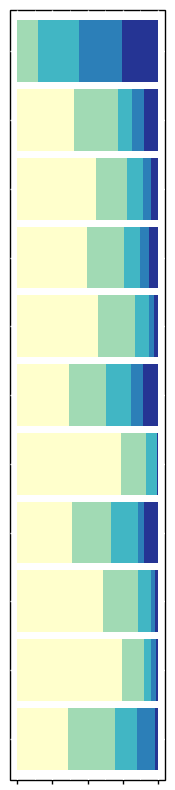

<ggplot: (8773974690717)>

In [12]:
save_as_pdf_pages([met_genes_stacked_bar_plot_not_all],'met_genes_stacked_bar_plot(without_J55454_H5471).pdf')
met_genes_stacked_bar_plot_not_all

## Tumor

In [13]:
tumor_genes_overlap_df_not_all = overlap_df(final_tumor_genes.drop(columns=['J55454','H5471']))

In [14]:
tumor_genes_overlap_df_not_all = tumor_genes_overlap_df_not_all.reset_index()
tumor_genes_overlap_df_not_all

,index,gene,tumor_ID,overlap
0,0,PGK1,HCI001,4
1,1,SELENON,HCI001,0
2,2,SNRPB,HCI001,0
3,3,SLC1A5,HCI001,0
4,4,HSP90AA1,HCI001,0
...,...,...,...,...
3201,191,LDHA,HCI011,4
3202,192,BNIP3,HCI011,3
3203,193,DDIT4,HCI011,4
3204,194,GAPDH,HCI011,7


In [15]:
tumor_genes_overlap_df_not_all['overlap'] = tumor_genes_overlap_df_not_all['overlap'].astype(float)
tumor_genes_overlap_df_not_all['overlap_range'] = tumor_genes_overlap_df_not_all['overlap']
for i in tumor_genes_overlap_df_not_all.index:
    if tumor_genes_overlap_df_not_all.loc[i, 'overlap'] >=4:
        tumor_genes_overlap_df_not_all.loc[i, 'overlap_range'] = '>4'

In [16]:
tumor_genes_overlap_df_not_all

,index,gene,tumor_ID,overlap,overlap_range
0,0,PGK1,HCI001,4.0,>4
1,1,SELENON,HCI001,0.0,0.0
2,2,SNRPB,HCI001,0.0,0.0
3,3,SLC1A5,HCI001,0.0,0.0
4,4,HSP90AA1,HCI001,0.0,0.0
...,...,...,...,...,...
3201,191,LDHA,HCI011,4.0,>4
3202,192,BNIP3,HCI011,3.0,3.0
3203,193,DDIT4,HCI011,4.0,>4
3204,194,GAPDH,HCI011,7.0,>4


In [17]:
cat_order = ['>4',3,2,1,0]

tumor_genes_overlap_df_not_all['overlap_range'] = pd.Categorical(tumor_genes_overlap_df_not_all['overlap_range'], categories=cat_order, ordered=True)

cat_order = ['HCI010','J53353','J2036','H5097','HCI001','HCI011','HCI009',
             'H4272','H3204','HCI005','global']

tumor_genes_overlap_df_not_all['tumor_ID'] = pd.Categorical(tumor_genes_overlap_df_not_all['tumor_ID'], categories=cat_order, ordered=True)

In [18]:
tumor_genes_stacked_bar_plot_ref_not_all, tumor_genes_stacked_bar_plot_not_all = DEGs_stacked_bar_plots(tumor_genes_overlap_df_not_all,color=['#253494','#2c7fb8','#41b6c4','#a1dab4','#ffffcc'])

/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: tumor_genes_stacked_bar_plot(without_J55454_H5471)_ref.pdf


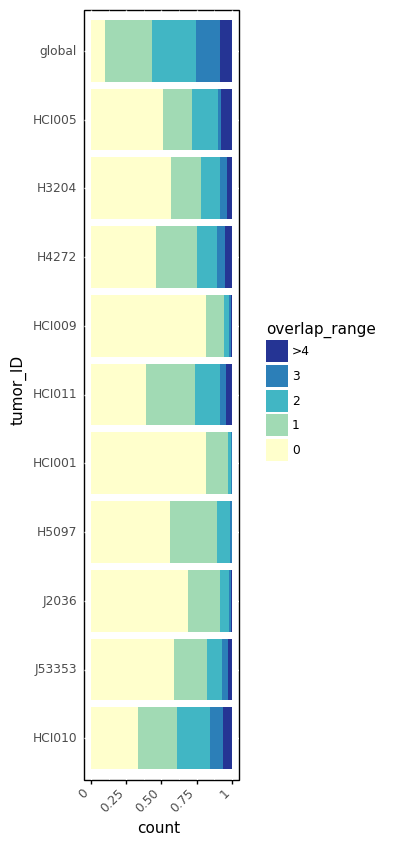

<ggplot: (8773972355850)>

In [19]:
save_as_pdf_pages([tumor_genes_stacked_bar_plot_ref_not_all],'tumor_genes_stacked_bar_plot(without_J55454_H5471)_ref.pdf')
tumor_genes_stacked_bar_plot_ref_not_all

/home/weilun/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:820: PlotnineWarning: Filename: tumor_genes_stacked_bar_plot(without_J55454_H5471).pdf


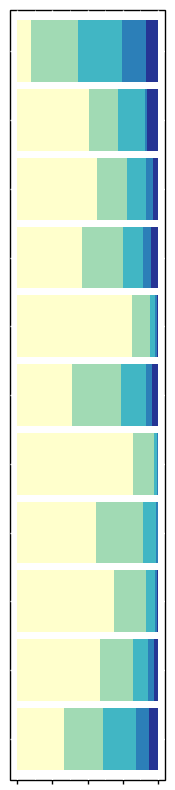

<ggplot: (8773972329614)>

In [20]:
save_as_pdf_pages([tumor_genes_stacked_bar_plot_not_all],'tumor_genes_stacked_bar_plot(without_J55454_H5471).pdf')
tumor_genes_stacked_bar_plot_not_all

In [21]:
met_genes_overlap_df_not_all

,index,gene,tumor_ID,overlap,overlap_range
0,0,IGFBP3,HCI001,0.0,0
1,1,CHI3L1,HCI001,1.0,1
2,2,LALBA,HCI001,0.0,0
3,3,DDIT4,HCI001,0.0,0
4,4,FRZB,HCI001,0.0,0
...,...,...,...,...,...
2980,175,SCCPDH,HCI011,2.0,2
2981,176,STRAP,HCI011,1.0,1
2982,177,SUGT1,HCI011,0.0,0
2983,178,HERPUD1,HCI011,1.0,1


In [27]:
met_genes_overlap_df_not_all.groupby(['overlap']).apply(len)/(len(met_genes_overlap_df_not_all))*100

overlap
0.0    56.515913
1.0    23.584590
2.0    10.552764
3.0     4.958124
4.0     2.177554
5.0     1.005025
6.0     0.938023
7.0     0.268007
dtype: float64

In [32]:
tumor_genes_overlap_df_not_all.groupby(['overlap_range']).apply(len)/(len(tumor_genes_overlap_df_not_all))*100

overlap_range
>4     2.245789
3      3.119152
2      9.357455
1     21.334997
0     63.942608
dtype: float64